                       INTRODUCTION
India has emerged as one of the fastest-growing startup ecosystems in the world, attracting significant investment in various sectors. The India startup funding dataset typically contains information on startup names, industry sectors, funding rounds, funding amounts, investor names, and funding dates

                   HYPOTHESIS
Null: Funding to start-ups in India has not changed over time.
Alternate: Funding to start-ups has changed over time

                        QUESTIONS 
1.  Which start-ups are found in the capital of India?
2.  Which start-ups are into Information technologies related business?
3.  which industry got most of the start-up funding and why did they get such an amount?
4.  Which industry got the least of the start-up funding. What may be the reason?
5.  Which year recorded the most companies being formed
6.  Which sectors receive most funding from investors?


In [2]:
import pandas as pd
import numpy as np

In [3]:
# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Other supporting libraries
import re
import warnings
# Hiding the warnings
warnings.filterwarnings('ignore')

In [5]:
data_2018 = pd.read_csv("Funding_CSV_Files\startup_funding2018.csv") # for the 2018 startup data
data_2019 =  pd.read_csv("Funding_CSV_Files\startup_funding2019.csv") # for the 2019 startup data
data_2020 = pd.read_csv("Funding_CSV_Files\startup_funding2020.csv") # for the 2020 startup data
data_2021 =  pd.read_csv("Funding_CSV_Files\startup_funding2021.csv") # for the 2021 startup data

In [6]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [7]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [8]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [9]:
data_2021 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [10]:
#Processing 2018 Data

In [11]:
# Selecting the main industries of the startups as Industry
data_2018['Industry'] = data_2018['Industry'].apply(str)
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'", "", regex=True)

In [12]:
# Selecting the main locations of the startups as Location
data_2018['Location'] = data_2018['Location'].apply(str)
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'", "", regex=True)

In [13]:
# Removing the commas and dashes from the Amounts
data_2018['Amount'] = data_2018['Amount'].apply(str)
data_2018['Amount'].replace(",", "", inplace = True, regex=True)
data_2018['Amount'].replace("—", 0, inplace = True, regex=True)
data_2018['Amount'].replace("$", "", inplace = True, regex=True)

In [14]:
## Creating temporary columns to help with the conversion of INR to USD
data_2018['INR Amount'] = data_2018['Amount'].str.rsplit('₹', n = 2).str[1]
data_2018['INR Amount'] = data_2018['INR Amount'].apply(float).fillna(0)
data_2018['USD Amount'] = data_2018['INR Amount'] * 0.012
data_2018['USD Amount'] = data_2018['USD Amount'].replace(0, np.nan)
data_2018['USD Amount'] = data_2018['USD Amount'].fillna(data_2018['Amount'])
data_2018['USD Amount'] = data_2018['USD Amount'].replace("$", "", regex=True)
data_2018["Amount"] = data_2018["USD Amount"]
data_2018["Amount"] = data_2018["Amount"].apply(lambda x: float(str(x).replace("$","")))
data_2018["Amount"] = data_2018["Amount"].replace(0, np.nan)

In [15]:
# Dropping the temporary columns
data_2018.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

In [16]:
# Adding a column to represent the year of funding
data_2018["Year of Funding"] = "2018"

In [17]:
print(data_2018.info())
data_2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     526 non-null    object 
 1   Industry         526 non-null    object 
 2   Round/Series     526 non-null    object 
 3   Amount           378 non-null    float64
 4   Location         526 non-null    object 
 5   About Company    526 non-null    object 
 6   Year of Funding  526 non-null    object 
dtypes: float64(1), object(6)
memory usage: 28.9+ KB
None


,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of Funding
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [18]:
#----------------- End of cleaning of 2018 csv file--------------

In [19]:
# Processing 2019 data

In [20]:
print(data_2019.info(), "\n")
data_2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [21]:
# Converting the Founded column to a string
data_2019['Founded'] = data_2019['Founded'].apply(str)

In [22]:
# Removing the commas and dashes from the Amounts
data_2019["Amount($)"] = data_2019["Amount($)"].apply(str)
data_2019["Amount($)"].replace(",", "", inplace = True, regex=True)

In [23]:
#Removing or replacing undisclosed 
data_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)

In [24]:
#Removing $
data_2019["Amount($)"] = data_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
data_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [25]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN


In [26]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
dtype: int64

In [27]:
# Appending years of funding to the respective dataframes
data_2019["Year of Funding"] = "2019"

In [28]:
#Processing the 2020 DataFrame
print(data_2020.info(), "\n")
data_2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [29]:
# Dropping the extra column in the 2020 DataFrame
data_2020 = data_2020.iloc[: , :-1]
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C


In [30]:
# Selecting the first value as Headquarters
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'", "", regex=True)

In [31]:
# Removing the commas, dashes and Undisclosed from the Amounts
data_2020["Amount($)"] = data_2020["Amount($)"].apply(str)
data_2020["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2020["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [32]:
# Removing the $ signs and converting the Amount column to float
data_2020["Amount($)"] = data_2020["Amount($)"].apply(lambda x: str(x).replace("$",""))

In [33]:
# Appending years of funding to the respective dataframes
data_2020["Year of Funding"] = "2020"

In [34]:
#Processing the 2021 DataFrame
print(data_2021.info(), "\n")
data_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [35]:
# Converting the Founded column to a string
data_2021['Founded'] = data_2021['Founded'].apply(str)
data_2021["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [36]:
# Removing the commas,dashes and undisclosed from the Amounts
data_2021["Amount($)"] = data_2021["Amount($)"].apply(str)
data_2021["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2021["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [37]:
# FanPlay has duplicated, and has wrongly placed amounts.
data_2021.drop([98], axis = 0, inplace = True)

data_2021.loc[data_2021["Company/Brand"] == "FanPlay", ["Amount($)", "Stage", "Investor"]] = [1200000, "Series A", "Upsparks"]
data_2021.loc[data_2021["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A


In [38]:
# The entries both represent Series C funding raised in 2021. One has to be deleted.
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare", ["Amount($)", "Stage", "Investor"]] = [22000000, "Series C", "Morgan Stanley Private Equity Asia"]
data_2021.drop([256], axis = 0, inplace = True)
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Morgan Stanley Private Equity Asia,22000000,Series C


In [39]:
# another error convert Amount to a float, this time by an entry "Seed"
data_2021.loc[data_2021["Amount($)"] == "Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [40]:
# Correcting for MoEVing
data_2021.loc[data_2021["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = [5000000, "Seed", np.nan]

In [41]:
# Correcting for Godamwale
data_2021.loc[data_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed", "Anand Aryamane"]

In [42]:
# A similar error by an entry "ah! Ventures", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "ah! Ventures"]
data_2021.loc[data_2021["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Seed", "ah! Ventures"]
data_2021.loc[data_2021["Company/Brand"] == "Little Leap"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,361133,Seed


In [43]:
# A similar error by an entry "Pre-series A", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "Pre-series A"]

data_2021.loc[data_2021["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Pre-series A", np.nan]
data_2021.loc[data_2021["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,361133,Pre-series A


In [44]:
# A similar error by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "ITO Angel Network LetsVenture"]

data_2021.loc[data_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = [300000, "Angel", "ITO Angel Network LetsVenture"]
data_2021.loc[data_2021["Company/Brand"] == "BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,ITO Angel Network LetsVenture,300000,Angel


In [45]:
# A similar error by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture"]

data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture", ["Amount($)", "Stage"]] = [1000000, "Seed"]
data_2021.loc[data_2021["Company/Brand"] == "Saarthi Pedagogy"]
data_2021.loc[data_2021["Stage"] == "$6000000"]

data_2021.loc[data_2021["Stage"] == "$6000000", ["Amount($)", "Stage"]] = [9627286, "Venture"]
data_2021.loc[data_2021["Company/Brand"] == "MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,9627286,Venture


In [46]:
data_2021["Amount($)"].replace('', 0, inplace = True, regex=True)
data_2021["Amount($)"] = data_2021["Amount($)"].apply(lambda x: str(x).replace("$",""))
data_2021["Amount($)"].replace('nan', 0, inplace = True, regex=True)
data_2021["Amount($)"] = pd.to_numeric(data_2021["Amount($)"])
data_2021["Amount($)"] = data_2021["Amount($)"].apply(float)

In [47]:
# Appending years of funding to the respective dataframes
data_2021["Year of Funding"] = "2021"

In [48]:
#we have to Joine the DataFrames which has similar column names
combined_19_21 = pd.concat([data_2019, data_2020, data_2021], ignore_index = True)
combined_19_21.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Year"]
combined_19_21

,Company Name,Year Founded,Headquarters,Sector,Description,Founders,Investors,Amount,Funding Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2346,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
2347,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
2348,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
2349,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [49]:
# there are columns in the 2018 dataframe rename to match with the other dataframes
data_2018.columns = ['Company Name', 'Sector', 'Funding Stage', 'Amount', 'Headquarters', 'Description', "Funding Year"]
data_2018

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [50]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
complete_set = pd.concat([data_2018, combined_19_21], ignore_index = True)
print(complete_set.info(), "\n")
complete_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   2877 non-null   object
 1   Sector         2859 non-null   object
 2   Funding Stage  1944 non-null   object
 3   Amount         2715 non-null   object
 4   Headquarters   2857 non-null   object
 5   Description    2877 non-null   object
 6   Funding Year   2877 non-null   object
 7   Year Founded   2109 non-null   object
 8   Founders       2332 non-null   object
 9   Investors      2249 non-null   object
dtypes: object(10)
memory usage: 224.9+ KB
None 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2872,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2873,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2874,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2875,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [51]:
# Converting various columns into appropriate formats
complete_set['Amount'] = complete_set['Amount'].replace(np.nan, 0)
complete_set['Amount'] = complete_set['Amount'].apply(str)
complete_set["Funding Year"] = complete_set["Funding Year"].apply(str)
complete_set["Year Founded"] = complete_set["Year Founded"].apply(str)

In [52]:
# Dropping all duplicates from the combined DataFrame
complete_set.drop_duplicates(inplace = True)
complete_set.reset_index(drop=True, inplace = True)


In [53]:
# final  Complete Set
print(complete_set.nunique(), "\n")
complete_set

Company Name     2214
Sector            595
Funding Stage      72
Amount            623
Headquarters      134
Description      2691
Funding Year        4
Year Founded       58
Founders         1980
Investors        1772
dtype: int64 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,nan,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,nan,NaN,NaN
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,nan,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,nan,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2852,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2853,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2854,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [54]:
# Exporting to the DataFrame in Excel
complete_set.to_csv("complete_set.csv", index = False)

In [55]:
#Checking the integrity of the combined DataFrame
#Company Name

In [56]:
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies

BharatPe                        10
Zomato                           7
MPL                              6
Nykaa                            6
Zetwerk                          6
                                ..
Genrobotics                      1
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
WeRize                           1
Name: Company Name, Length: 2214, dtype: int64

In [57]:
# Capitalizing only the first letters of each entry in the column for normalization
complete_set["Company Name"] = complete_set["Company Name"].apply(lambda x: str(x).capitalize())

In [58]:
# Correcting the misspelt names of startups
complete_set.loc[complete_set["Company Name"] == "Byju", "Company Name"] = "Byju's"

In [59]:
# Reassigning the dataframe and previewing it
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies.head(10)

Byju's      10
Bharatpe    10
Zomato       7
Nykaa        6
Trell        6
Zetwerk      6
Vedantu      6
Oyo          6
Mpl          6
Spinny       6
Name: Company Name, dtype: int64

<Axes: >

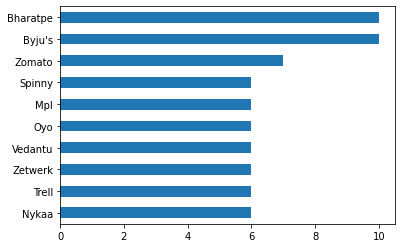

In [60]:
#visualizing companies
unique_companies.head(10).sort_values().plot.barh()

In [61]:
# fro Sectors
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors

FinTech                             174
EdTech                              147
Financial Services                   86
Fintech                              85
Edtech                               74
                                   ... 
Startup laboratory                    1
Online credit management startup      1
Battery design                        1
Eyeglasses                            1
Staffing & Recruiting                 1
Name: Sector, Length: 595, dtype: int64

In [62]:
# Equating similar entries in the Sector column for ease of analysis
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace(" and ", " & "))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("startup", ""))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("  ", " "))
complete_set.loc[complete_set["Sector"] == "nan", "Sector"] = "Sector TBD"
complete_set.loc[complete_set["Sector"] == "â€”", "Sector"] = "Sector TBD"

In [63]:
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech               174
EdTech                147
Financial Services     86
Fintech                85
Edtech                 74
E-commerce             73
Automotive             53
AgriTech               43
Food & Beverages       41
Logistics              37
Name: Sector, dtype: int64

Text(0.5, 1.0, 'Funding Deals for Sector')

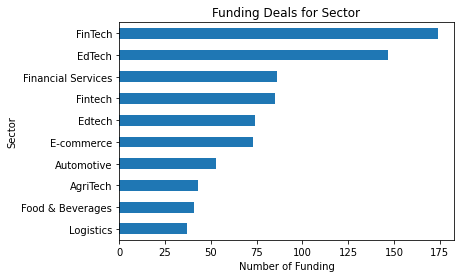

In [64]:
#visualization of sectors per number of funding deals 
unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding")
plt.ylabel("Sector")
plt.title("Funding Deals for Sector")

In [65]:
#Funding Stage
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(15)

Seed                        603
Series A                    305
Pre-series A                209
Series B                    134
Series C                    114
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     50
Debt                         45
Angel                        38
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Name: Funding Stage, dtype: int64

Text(0.5, 1.0, 'Funding Deals per Funding Stage')

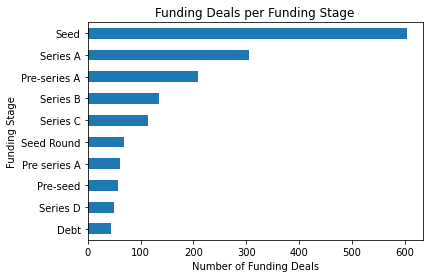

In [66]:
#Visualisation of Numbers of funding deal wiht funding stage
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Funding Stage")
plt.title("Funding Deals per Funding Stage")

In [67]:
# same for Amount
unique_amounts = (complete_set.loc[:,"Amount"]).value_counts()
unique_amounts

nan                245
0                  162
0.0                139
1000000.0          116
2000000.0           77
                  ... 
764000               1
887000 23000000      1
2110000              1
1080000              1
55000000.0           1
Name: Amount, Length: 623, dtype: int64

In [68]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [69]:
# Replacing all Nulls with zero
complete_set.loc[complete_set["Amount"] == "nan", "Amount"] = np.nan
complete_set["Amount"].fillna(0.00,inplace = True)

In [70]:
#a copy of the DataFrame sorted by Amount
amt_sorting = (complete_set.loc[complete_set["Amount"] != 0]).round(2).sort_values(by = "Amount")
amt_sorting

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
1159,Bulbul,Social commerce,NaN,8700000,Gurgaon,A video and livestream led commerce platform t...,2020,2018,"Sachin Bhatia, Atit Jain",Info Edge
96,Khidki,Artificial Intelligence,Seed,0,Bangalore,Vernacular Social Network Focused on Town Leve...,2018,nan,NaN,NaN
110,Stones2milestones,E-Learning,Seed,0,Gurgaon,Stones2milestones is a Gurgaon Based Learning ...,2018,nan,NaN,NaN
111,Generico,Health Care,Series A,0,Mumbai,Generico is the fastest growing specialized ph...,2018,nan,NaN,NaN
112,Adiuvo diagnostics,Health Diagnostics,Seed,0,Chennai,Adiuvo Diagnostics is a medical diagnostic dev...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1579,Wizklub,Edtech,Seed Funding,982530,Bangalore,Helps students solve problems at complex level,2020,2018,Amit Bansal,Incubate Fund India
1567,1mg,Healthtech,NaN,9900000,Gurugram,Online pharmacy,2020,2015,"Prashant Tandon, Gaurav Agarwal, Vikas Chauhan",Bill & Melinda Gates Foundation
481,Sharechat,Internet,Series C,99230000.0,Bangalore,ShareChat is a social networking and regional ...,2018,nan,NaN,NaN
1276,Credgencies,AI & Debt,Seed Round,Undiclsosed,nan,Tech-enabled platform for resolution of non-pe...,2020,2018,"Rishabh Goel, Anand Agrawal, Mayank Khera",Titan Capital


FUNDING YEAR

In [ ]:
complete_set["Funding Year"].apply(str) # Applying string formatting
complete_set["Funding Year"].fillna(np.nan, inplace = True) # Filling unknown spaces with null
funding_year = (complete_set.loc[:,"Funding Year"]).value_counts()
funding_year = funding_year.sort_index()
funding_year

2018     525
2019      89
2020    1052
2021    1190
Name: Funding Year, dtype: int64

Text(0.5, 0, 'Number of Deals')

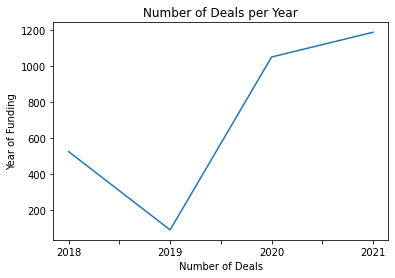

In [ ]:
funding_year.plot()
plt.title("Number of Deals per Year")
plt.ylabel("Year of Funding")
plt.xlabel("Number of Deals")

It can be seen that the number of funding deals, declined in 2019, is increasing sharply. Number of funding deals increased from 525 in 2018 to 1190 in 2021. This indicates that a new startup would be able to land a funding deal in the future since the number of deals is on an increasing trajectory.

Year Founded

In [ ]:
((complete_set.loc[:,"Year Founded"]).value_counts())[1:]

2020.0    231
2019.0    180
2018.0    148
2015.0    140
2015      135
2016.0    125
2018      123
2017.0    117
2019      104
2016      103
2017       92
2014       72
2021.0     70
2014.0     64
2020       42
2012       39
2011.0     37
2013       36
2012.0     33
2011       30
2013.0     28
2008       18
2010.0     18
2010       16
2008.0     16
2009        7
2009.0      7
2000.0      6
2006        6
2007.0      6
2007        4
2004.0      3
2006.0      3
1999.0      2
2002.0      2
1994.0      2
1989.0      2
1998.0      2
1995        2
2003.0      1
1991.0      1
1984.0      1
2005.0      1
1978.0      1
1982        1
1993.0      1
2001        1
2004        1
2002        1
-           1
1973        1
2005        1
1994        1
1999        1
1978        1
1998        1
1963.0      1
Name: Year Founded, dtype: int64

In [ ]:
# Making final touches to the column for further analysis
complete_set["Year Founded"].apply(str) # Applying string formatting
complete_set["Year Founded"].replace("-","nan", inplace = True) # Replacing dashes with nan
complete_set["Year Founded"] = complete_set["Year Founded"].apply(lambda x: str(x).replace(".0","")) # Removing .0 attached
year_founded = ((complete_set.loc[:,"Year Founded"]).value_counts())[1:] # Excluding the rows with "nan"
year_founded = year_founded.sort_index() # Showing trend of startups founded since 2000
year_founded

1963      1
1973      1
1978      2
1982      1
1984      1
1989      2
1991      1
1993      1
1994      3
1995      2
1998      3
1999      3
2000      6
2001      1
2002      3
2003      1
2004      4
2005      2
2006      9
2007     10
2008     34
2009     14
2010     34
2011     67
2012     72
2013     64
2014    136
2015    275
2016    228
2017    209
2018    271
2019    284
2020    273
2021     70
Name: Year Founded, dtype: int64

In [ ]:
# Taking a look at which "startups" were founded earlier than 2000
complete_set.loc[(complete_set["Year Founded"] == "1963") |
                (complete_set["Year Founded"] == "1973") |
                (complete_set["Year Founded"] == "1978") |
                (complete_set["Year Founded"] == "1982") |
                (complete_set["Year Founded"] == "1984") |
                (complete_set["Year Founded"] == "1989") |
                (complete_set["Year Founded"] == "1991") |
                (complete_set["Year Founded"] == "1993") |
                (complete_set["Year Founded"] == "1994") |
                (complete_set["Year Founded"] == "1995") |
                (complete_set["Year Founded"] == "1998") |
                (complete_set["Year Founded"] == "1999")].sort_values(by = "Year Founded")

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
2648,Duroflex,Furniture,NaN,60000000.0,Bangalore,"5 decades of experience, superior quality and ...",2021,1963,P. C. Mathew,Norwest Venture Partners
940,Reliance,Multinational conglomerate company,NaN,2200000000,Mumbai,Reliance owns businesses across India engaged ...,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
765,Biocon,Healthcare,NaN,15000000,Bangalore,"Biocon is a healthcare and technology, company...",2020,1978,Kiran Mazumdar-Shaw,Goldman Sachs
2103,Biocon biologics,BioTechnology,NaN,70000000.0,Bangalore,Biocon is a fully integrated pure play biosimi...,2021,1978,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital"
644,Arya,AgriTech,Series B,21000000,Noida,"""Simplifying Agribusiness"" Throughout Agri-Sup...",2020,1982,"Chattanathan Devarajan, Prasanna Rao, Anand Ch...",Quona Capital
2381,Five star finance,FinTech,NaN,234000000.0,Chennai,Five-Star is a Registered Non Banking Finance ...,2021,1984,V K Ranganathan,"TPG Capital Asia, Epiq Capital"
1727,Wess,Renewable Energy,Seed,2000000.0,Mumbai,Waaree is India's Largest Solar Module Manufac...,2021,1989,Hitesh Doshi,Centrum Financial Services
2647,Vlcc health care,"Health, Wellness & Fitness",NaN,4000000.0,Gurugram,VLCC is today widely recognized for its compre...,2021,1989,Vandana Luthra,NaN
2370,Safex chemicals,AgriTech,NaN,50000000.0,New Delhi,Safex Chemicals India Ltd is a leading company...,2021,1991,"SK Jindal, SK Chaudhary",BanyanTree Finance Pvt. Ltd.
1681,Tessolve,Electronics,NaN,40000000.0,Bangalore,Tessolve Semiconductor offers engineering in s...,2021,1993,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital


In [ ]:
# After crosschecking the internet for the founding years of the startups, some mistakes in the data were noted and will be corrected accordingly:
## Arya was founded in 2013
complete_set.loc[complete_set["Company Name"] == "Arya", "Year Founded"] = "2013"

# CreditWise Capital was founded in 2018
complete_set.loc[complete_set["Company Name"] == "Credit wise capital", "Year Founded"] = "2018"

# Lendingkart was founded in 2014
complete_set.loc[complete_set["Company Name"] == "Lendingkart", "Year Founded"] = "2014"

# Nobel hygiene was founded in 2001
complete_set.loc[complete_set["Company Name"] == "Nobel hygiene", "Year Founded"] = "2001"

Text(0.5, 0, 'Number of Transactions')

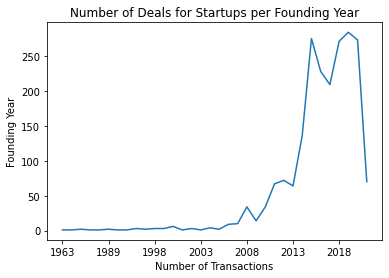

In [ ]:
year_founded.plot()
plt.title("Number of Deals for Startups per Founding Year")
plt.ylabel("Founding Year")
plt.xlabel("Number of Transactions")

It is observed that newer startups are involved in more funding deals, with an overall increase from startups founded in 2000. 2021's low value may imply lower chances of landing a funding deal in the same year which a startup was founded. As such, it is fair to say that other sources of finance may be used in the first year of founding before actively seeking a funding deal down the line.

LOCATIONS

In [ ]:
unique_locations = (complete_set.loc[:,"Headquarters"]).value_counts()
unique_locations

Bangalore      859
Mumbai         468
Gurugram       238
New Delhi      230
Chennai        106
              ... 
France           1
Palmwoods        1
Milano           1
Bangaldesh       1
Gandhinagar      1
Name: Headquarters, Length: 134, dtype: int64

Text(0.5, 1.0, 'Funding Deals per City')

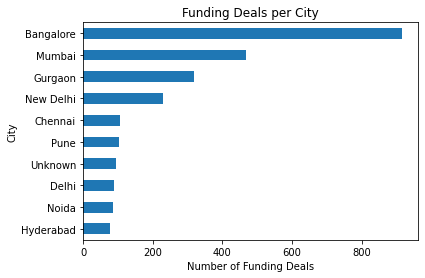

In [ ]:
unique_locations.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("City")
plt.title("Funding Deals per City")

It is clear from the above graph that Bangalore (916) leads the pack (as the city with most startups involved in deals) by almost twice as much as the next location, Mumbai, which has 471. It also leaves a fair distance between itself and Gurgaon (317), New Delhi (230), Chennai (106), and Pune (104) in that order.

These make up about 75% of the total transactions over the period, thus pointing to part acceptance of the null hypothesis which posits that funding to startups is centralized around specific locations and sectors.

Amount

In [ ]:
unique_amounts = (complete_set.loc[:,"Amount"]).value_counts()
unique_amounts

0.0                245
0                  162
0.0                139
1000000.0          116
2000000.0           77
                  ... 
764000               1
887000 23000000      1
2110000              1
1080000              1
55000000.0           1
Name: Amount, Length: 623, dtype: int64

In [ ]:
complete_set.describe()

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
count,2856,2856,1931,2856.00,2836,2856,2856,2856,2312,2230
unique,2151,594,72,623.00,134,2691,4,58,1980,1772
top,Byju's,FinTech,Seed,0.00,Bangalore,BYJU'S is an educational technology company th...,2021,nan,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
freq,10,174,603,245.00,859,5,1190,767,7,35


In [ ]:
# Equating similar entries in the Sector column for ease of analysis (2)
complete_set.loc[complete_set["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Accounting", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Ad-tech", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advertisement", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advertising", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advisory firm", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Aeorspace", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Aero company", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Agri tech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agriculture", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agritech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agritech/commerce", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agtech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Ai & data science", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & debt", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & deep learning", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & media", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & tech", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai chatbot", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai company", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai health", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai platform", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai robotics", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Air transportation", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Alternative medicine", "Sector"] = "Medical"
complete_set.loc[complete_set["Sector"] == "Analytics", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Appliance", "Sector"] = "Appliances & Electronics"
complete_set.loc[complete_set["Sector"] == "Apps", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Ar platform", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Ar", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Ar/vr", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Artificial intelligence", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Audio", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Augmented reality", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Auto-tech", "Sector"] = "Automation tech"
complete_set.loc[complete_set["Sector"] == "Automation", "Sector"] = "Automation tech"
complete_set.loc[complete_set["Sector"] == "Automobile & technology", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobile technology", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobile", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobiles", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive & rentals", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive and rentals", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive company", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive tech", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Autonomous vehicles", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Aviation", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Ayurveda tech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "B2b agritech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b manufacturing", "Sector"] = "Manufacturing"
complete_set.loc[complete_set["Sector"] == "B2b marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b service", "Sector"] = "B2b"
complete_set.loc[complete_set["Sector"] == "B2b supply chain", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "B2b travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "B2b", "Sector"] = "B2b"
complete_set.loc[complete_set["Sector"] == "Banking", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Battery design", "Sector"] = "Battery"
complete_set.loc[complete_set["Sector"] == "Battery manufacturer", "Sector"] = "Battery"
complete_set.loc[complete_set["Sector"] == "Beauty & wellness", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Beauty products", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Beverage", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Beverage", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Beverages", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Big data", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Bike marketplace", "Sector"] = "Bike services"
complete_set.loc[complete_set["Sector"] == "Bike rental", "Sector"] = "Bike services"
complete_set.loc[complete_set["Sector"] == "Biopharma", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Biotech", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Biotechnology company", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Biotechnology", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Blockchain", "Sector"] = "Cryptocurrency"
complete_set.loc[complete_set["Sector"] == "Blogging", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Brand marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Broadcasting", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Business development", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Business intelligence", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Business travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Cannabis", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Capital markets", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Car service", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Car trade", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Catering", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Children", "Sector"] = "Child care"
complete_set.loc[complete_set["Sector"] == "Classifieds", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Clean energy", "Sector"] = "Clean energy"
complete_set.loc[complete_set["Sector"] == "Clean energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Cleantech", "Sector"] = "Clean energy"
complete_set.loc[complete_set["Sector"] == "Cleantech", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Clothing", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Cloud company", "Sector"] = "Cloud computing"
complete_set.loc[complete_set["Sector"] == "Cloud infrastructure", "Sector"] = "Cloud computing"
complete_set.loc[complete_set["Sector"] == "Commerce", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Commercial real estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Commercial", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Communities", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Communities", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Community platform", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Community platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Community", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Community", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Computer games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Computer software", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Construction tech", "Sector"] = "Construction"
complete_set.loc[complete_set["Sector"] == "Consultancy", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Consulting", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Consumer appliances", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer applications", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer electronics", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer goods", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer lending", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Consumer service", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer services", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer software", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer software", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Consumer", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Content commerce", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content creation", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content management", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content marketplace", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content marktplace", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content publishing", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Continuing education", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Conversational ai platform", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Cooking", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Cosmetics", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Coworking", "Sector"] = "Co-working"
complete_set.loc[complete_set["Sector"] == "Creative agency", "Sector"] = "Arts & crafts"
complete_set.loc[complete_set["Sector"] == "Credit cards", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Credit", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Crm", "Sector"] = "Customer service"
complete_set.loc[complete_set["Sector"] == "Crypto", "Sector"] = "Cryptocurrency"
complete_set.loc[complete_set["Sector"] == "Customer service company", "Sector"] = "Customer service"
complete_set.loc[complete_set["Sector"] == "Cybersecurity", "Sector"] = "Computer & network security"
complete_set.loc[complete_set["Sector"] == "D2c business", "Sector"] = "D2c"
complete_set.loc[complete_set["Sector"] == "D2c fashion", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "D2c jewellery", "Sector"] = "Jewellery"
complete_set.loc[complete_set["Sector"] == "Dairy", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Data analytics", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Data intelligence", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Data science", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Dating app", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Dating", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Deep tech ai", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Deep tech", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Deeptech", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Defense & space", "Sector"] = "Defense"
complete_set.loc[complete_set["Sector"] == "Defense tech", "Sector"] = "Defense"
complete_set.loc[complete_set["Sector"] == "Deisgning", "Sector"] = "Design"
complete_set.loc[complete_set["Sector"] == "Delivery service", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Delivery", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Dental", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Design", "Sector"] = ""
complete_set.loc[complete_set["Sector"] == "Dietary supplements", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Digital entertainment", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Digital marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Digital media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Digital mortgage", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "E store", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce & ar", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce platforms", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-learning", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "E-market", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-mobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "E-sports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "E-tail", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Edtech", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Edttech", "Sector"] = "Edtech"
complete_set.loc[complete_set["Sector"] == "Edttech", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Education management", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Electricity", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Electronics", "Sector"] = "Appliances & Electronics"
complete_set.loc[complete_set["Sector"] == "Emobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Enterprise software", "Sector"] = "Enterprise resource planning (erp)"
complete_set.loc[complete_set["Sector"] == "Environmental consulting", "Sector"] = "Environmental services"
complete_set.loc[complete_set["Sector"] == "Environmental service", "Sector"] = "Environmental services"
complete_set.loc[complete_set["Sector"] == "Equity management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Esports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Estore", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Ev", "Sector"] = "Electric vehicle"
complete_set.loc[complete_set["Sector"] == "Events", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Eye wear", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Eyeglasses", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Eyewear", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Facilities support service", "Sector"] = "Facilities services"
complete_set.loc[complete_set["Sector"] == "Fantasy sports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Farming", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Fashion & lifestyle", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Fashion tech", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Fashion", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Femtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Fertility tech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Finance company", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Finance", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Financial services", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Fintech", "Sector"] = "Fintech"
complete_set.loc[complete_set["Sector"] == "Fishery", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Fitness", "Sector"] = "Personal care"
complete_set.loc[complete_set["Sector"] == "Fmcg", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Food & bevarages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & beverage", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & beverages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & logistics", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & Nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food delivery", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food devlivery", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food diet", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food industry", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food processing", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food production", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foodtech & logistics", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foodtech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foootwear", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Funding platform", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Furniture rental", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Furniture", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Fusion beverages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Gaming", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Healtcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health & fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health & wellness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health and fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health care", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health diagnostics", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health insurance", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Health", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health, wellness & fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthcare/edtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Heathcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Heathtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Helathcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Higher education", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Home decor", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home design", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home interior services", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home services", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Hospital & health care", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Hospital", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Hospitality", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Housing & rentals", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Housing marketplace", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Housing", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Hr tech", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hr", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hrtech", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Human resources", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hygiene management", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Information technology & services", "Sector"] = "Information technology"
complete_set.loc[complete_set["Sector"] == "Insurance tech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insurance technology", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insuretech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insurtech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Interior & decor", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Interior design", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Internet of things", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "Investment banking", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment tech", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Iot platform", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "Iot/automobile", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "It company", "Sector"] = "It"
complete_set.loc[complete_set["Sector"] == "Job discovery platform", "Sector"] = "Job search"
complete_set.loc[complete_set["Sector"] == "Job portal", "Sector"] = "Job search"
complete_set.loc[complete_set["Sector"] == "Last mile transportation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Legal services", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Legal tech", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Legaltech", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Logistics", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Logitech", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Luxury car", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Management consulting", "Sector"] = "Advisory"
complete_set.loc[complete_set["Sector"] == "Market research", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing & advertising", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing & customer loyalty", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing company", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Martech", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Matrimony", "Sector"] = "Marriage"
complete_set.loc[complete_set["Sector"] == "Mechanical & industrial engineering", "Sector"] = "Engineering"
complete_set.loc[complete_set["Sector"] == "Mechanical or industrial engineering", "Sector"] = "Engineering"
complete_set.loc[complete_set["Sector"] == "Med tech", "Sector"] = "Medical"
complete_set.loc[complete_set["Sector"] == "Media & entertainment", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media & networking", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media and entertainment", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media tech", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Medical device", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Medtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Mental health", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Micro-mobiity", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Milk", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Mlops platform", "Sector"] = "Machine learning"
complete_set.loc[complete_set["Sector"] == "Mobile games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Mobile games", "Sector"] = "Mobile"
complete_set.loc[complete_set["Sector"] == "Mobile payments", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Mobility tech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Mobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Mobility/transport", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Music streaming", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Music", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Mutual funds", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Nano distribution network", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Neo-banking", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Networking platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Networking", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "News", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Nft marketplace", "Sector"] = "NFT"
complete_set.loc[complete_set["Sector"] == "Nft", "Sector"] = "NFT"
complete_set.loc[complete_set["Sector"] == "Nutrition sector", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Nutrition tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Oil & energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Online credit management", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Online financial service", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Online games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Online media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Online portals", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Packaging solution", "Sector"] = "Packaging services"
complete_set.loc[complete_set["Sector"] == "Pet care", "Sector"] = "Animal Care"
complete_set.loc[complete_set["Sector"] == "Pharma", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Pharmacy", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Podcast", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Pollution control equiptment", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Preschool daycare", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Professional training & coaching", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Publication", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Real estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Real Estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Reatil", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Recruitment", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Renewable player", "Sector"] = "Renewable energy"
complete_set.loc[complete_set["Sector"] == "Renewables & environment", "Sector"] = "Renewable energy"
complete_set.loc[complete_set["Sector"] == "Rental space", "Sector"] = "Rentals"
complete_set.loc[complete_set["Sector"] == "Rental", "Sector"] = "Rentals"
complete_set.loc[complete_set["Sector"] == "Retail aggregator", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Retail tech", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Robotics & ai", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Robotics", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Saas platform", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == " Saas", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "Saas/edtech", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "SaasÂ Â startup", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "Sales & distribution", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sales & services", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sales and distribution", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sanitation solutions", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Skincare", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Skincare", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Sles & marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sles and marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Social audio", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Social commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Social community", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social e-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Social media & communities", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social media", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social network", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Software company", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Soil-tech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Solar monitoring company", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar saas", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar solution", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Sportstech", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Staffing & recruiting", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Supply chain platform", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Supply chain, agritech", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Taxation", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Tech company", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Tech hub", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Tech platform", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Technology", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Techonology", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Telecommuncation", "Sector"] = "Telecommunication"
complete_set.loc[complete_set["Sector"] == "Telecommunications", "Sector"] = "Telecommunication"
complete_set.loc[complete_set["Sector"] == "Textiles", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Tobacco", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Tourism & ev", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Tourism", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Trading platform", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Training", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Transport & rentals", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transport automation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transport", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transportation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel & saas", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel tech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Traveltech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Vehicle repair", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Venture capital & private equity", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Venture capital", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Venture capitalist", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Veterinary", "Sector"] = "Animal Care"
complete_set.loc[complete_set["Sector"] == "Video personalization", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video sharing platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video streaming platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Virtual auditing", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Virtual banking", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Visual media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Vr & saas", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Wealth management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Wedding", "Sector"] = "Marriage"
complete_set.loc[complete_set["Sector"] == "Wellness", "Sector"] = "Personal care"
complete_set.loc[complete_set["Sector"] == "Wine & spirits", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Yoga & wellness", "Sector"] = "Personal care"


In [ ]:
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech                      174
EdTech                       147
E-commerce                   123
Education                    113
Financial Services           104
Medicine & healthcare        101
Fintech                       85
Automobiles & automotives     71
Food & Nutrition              49
Logistics & supply chain      47
Name: Sector, dtype: int64

            ANSWERING THE QUESTIONS ASKED ABOVE


 1. Which start-ups are found in the capital of India?

In [ ]:
start_up_found_in_New_delhi = complete_set.groupby("Company Name")["Headquarters"].sum().reset_index()
start_up_found_in_New_delhi

,Company Name,Headquarters
0,&me,Bangalore
1,1bridge,Bangalore
2,1crowd,Mumbai
3,1k kirana bazaar,Gurugram
4,1mg,Gurugram
...,...,...
2146,Zupee,nanGurugramGurgaon
2147,Zuper,Seattle
2148,Zvesta,Gurugram
2149,Zyla health,New Delhi


2. Which start-ups are found in the capital City (New Delhi)?

In [ ]:
start_up_found_in_New_delhi = complete_set[complete_set.Headquarters == "New Delhi"]
start_up_found_in_New_delhi

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
18,Appwharf,Artificial Intelligence,Seed,0,New Delhi,Appwharf is an intelligent assistant that help...,2018,nan,NaN,NaN
22,Sleepy owl coffee,Food & Beverage,Seed,420000.0,New Delhi,Makers of a signature coffee that's exceptiona...,2018,nan,NaN,NaN
30,Chariot tech,Internet of Things,Seed,240000.0,New Delhi,Chariot Tech is an Internet of Things (IoT) st...,2018,nan,NaN,NaN
37,Kriger campus,Education,Seed,360000.0,New Delhi,A Education Start Up.,2018,nan,NaN,NaN
40,Chakr innovation,Renewable Energy,Seed,0,New Delhi,Chakr has developed the world’s first retro-fi...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2788,Eupheus learning,Education,Series C,10000000.0,New Delhi,Offer pedagogically differentiated technology ...,2021,2017.0,"Sarvesh Shrivastava, Ved Prakash Khatri, Amit ...",Lightrock India
2802,Boutique spirit brands,Wine & Spirits,NaN,10000000.0,New Delhi,Boutique Spirit Brands is a leading Brand crea...,2021,2016.0,Rahul Gagerna,"IIFL﻿, ﻿Anicut Angel Fund﻿, ﻿Kae Capital﻿, Tra..."
2805,Paytail,Financial Services,Seed,1500000.0,New Delhi,Paytail is revolutionizing the offline commerc...,2021,2020.0,"AMIT CHATURVEDI, Vikas Garg",Cholamandalam
2845,Gokwik,Information Technology & Services,Pre-series A,5000000.0,New Delhi,GoKwik is a platform for solving shopping expe...,2021,2020.0,"Ankush Talwar, Chirag Taneja, Vivek Bajpai","Matrix Partners India, Jitendra Gupta, RTP Global"


In [ ]:
complete_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   2856 non-null   object
 1   Sector         2856 non-null   object
 2   Funding Stage  1931 non-null   object
 3   Amount         2856 non-null   object
 4   Headquarters   2836 non-null   object
 5   Description    2856 non-null   object
 6   Funding Year   2856 non-null   object
 7   Year Founded   2856 non-null   object
 8   Founders       2312 non-null   object
 9   Investors      2230 non-null   object
dtypes: object(10)
memory usage: 223.2+ KB


In [ ]:
complete_set["Amount"]

0         250000.0
1         480000.0
2         780000.0
3        2000000.0
4                0
           ...    
2851     3000000.0
2852    20000000.0
2853    55000000.0
2854    26000000.0
2855     8000000.0
Name: Amount, Length: 2856, dtype: object

2. Which start-ups are into Information technologies related business

In [78]:
Information_Tech_companies = complete_set[complete_set['Sector']== 'EdTech']
Information_Tech_companies

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
54,Notesgen,EdTech,Seed,150000.0,New Delhi,A Global Peer-to-Peer and Peer-to-Group Learni...,2018,nan,NaN,NaN
93,Nopaperforms solutions pvt. ltd.,EdTech,Series B,3980000.0,New Delhi,"NoPaperForms is a marketing automation, lead n...",2018,nan,NaN,NaN
104,Toppr,EdTech,Series C,35000000.0,Mumbai,Toppr.com is an online preparation platform fo...,2018,nan,NaN,NaN
113,Datatrained,EdTech,Seed,1440000.0,Bangalore,"DataTrained is a educational platform, which o...",2018,nan,NaN,NaN
130,Byju’s,EdTech,Private Equity,540000000.0,Bangalore,BYJU’s is an edtech company that is reinventin...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2813,Ockypocky,EdTech,Seed,0.0,Gurugram,OckyPocky is India's 1st interactive English l...,2021,2015.0,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund"
2821,Codingal,EdTech,Seed,1200000.0,Bangalore,Codingal is on a mission to inspire school kid...,2021,2020.0,"Vivek Prakash, Satyam Baranwal",NaN
2827,Habbit,EdTech,Pre-seed,320000.0,Bangalore,Habbit is online learning community for anyone...,2021,2020.0,"Somnath Sandeep, Raghav Goyal",Ashok Goyal
2831,Vidyakul,EdTech,Bridge,500000.0,Gurugram,Vidyakul is a group of academic experts.,2021,2017.0,"Tarun Saini, Gaurav Singhvi",We Founder Circle


The total number of Information Technology start up Companies in India from 2018 to 2021

In [79]:
Information_Tech_companies['Sector'].count()

147